In [6]:
import requests
import json
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import squarify
%matplotlib inline

In [7]:
raw_data = pd.read_csv('Profeco_Catalog.csv')
raw_data.head(1)

,Unnamed: 0,_id,cadenaComercial,catalogo,categoria,direccion,estado,fechaRegistro,giro,latitud,longitud,marca,municipio,nombreComercial,precio,presentacion,producto,razonSocial,rfc
0,0,571e4c002f232201006c6cac,HIPERMERCADO SORIANA,BASICOS,TORTILLAS Y DERIVADOS DEL MAIZ,"BLVD. ADOLFO LOPEZ MATEOS 1100, ESQ. CALAFIA, ...",BAJA CALIFORNIA,2015-02-10,TIENDA DE AUTOSERVICIO,32.641719,-115.469582,S/M,MEXICALI,SORIANA HIPER SUCURSAL CALAFIA,11.9,1 KG. GRANEL,TORTILLA DE MAIZ,NaN,NaN


In [8]:
master_frame = raw_data.drop(columns = ['giro','razonSocial','rfc','catalogo','Unnamed: 0','direccion','nombreComercial']).reset_index(drop=True).rename(index=str, columns={"_id": "ID", "cadenaComercial": "Cadena", "categoria": "Categoría", "estado": "Estado", "fechaRegistro": "Fecha", "latitud": "Latitud", "longitud": "Longitud", "marca": "Marca", "municipio": "Municipio", "precio": "Precio", "presentacion": "Presentación", "producto": "Producto"})
master_frame.head(1)

,ID,Cadena,Categoría,Estado,Fecha,Latitud,Longitud,Marca,Municipio,Precio,Presentación,Producto
0,571e4c002f232201006c6cac,HIPERMERCADO SORIANA,TORTILLAS Y DERIVADOS DEL MAIZ,BAJA CALIFORNIA,2015-02-10,32.641719,-115.469582,S/M,MEXICALI,11.9,1 KG. GRANEL,TORTILLA DE MAIZ


In [9]:
df_year_registry = master_frame.groupby('Fecha')['Fecha'].count()
df_year_registry

Fecha
2012-01-10      9063
2013-01-10     40539
2015-02-10    131192
2016-05-10     38788
Name: Fecha, dtype: int64

Text(0.5,1,'Registro de Productos/ Año: Profeco')

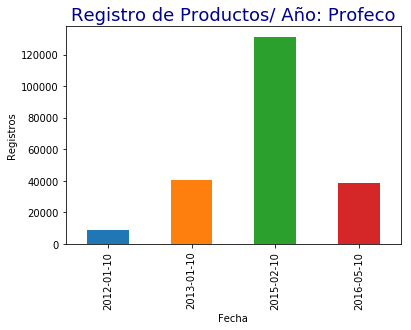

In [10]:
Year_RegChart = df_year_registry.plot.bar()
Year_RegChart.set_ylabel('Registros')
Year_RegChart.set_title('Registro de Productos/ Año: Profeco',fontsize = 18, color= 'DarkBlue')

In [11]:
master_2015frame = master_frame[(master_frame['Fecha'] == '2015-02-10')]
#master_2015frame
df_category = master_2015frame.groupby('Categoría')['Categoría'].count().nlargest(10)
df_category

Categoría
MEDICAMENTOS                         20720
ARTS. PARA EL CUIDADO PERSONAL       10446
APARATOS ELECTRICOS                   8286
DETERGENTES Y PRODUCTOS SIMILARES     7660
DERIVADOS DE LECHE                    7312
CARNES FRIAS SECAS Y EMBUTIDOS        6812
REFRESCOS ENVASADOS                   6216
CONDIMENTOS                           5964
FRUTAS Y LEGUMBRES PROCESADAS         5868
APARATOS ELECTRONICOS                 5684
Name: Categoría, dtype: int64

Text(0.5,1,'Registros por Categoria')

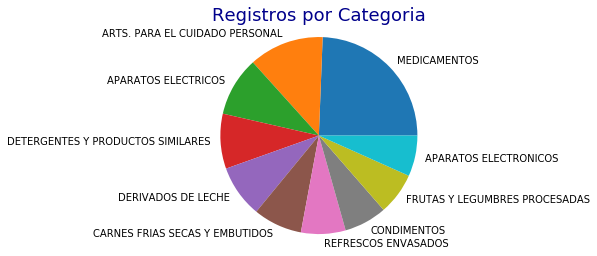

In [12]:
Category_Plot_pie = df_category.plot.pie()
Category_Plot_pie.axis('equal')
Category_Plot_pie.set_ylabel("")
Category_Plot_pie.set_xlabel("")
Category_Plot_pie.set_title('Registros por Categoria',fontsize = 18, color= 'DarkBlue')

Text(0.5,1,'Registros por Categoria')

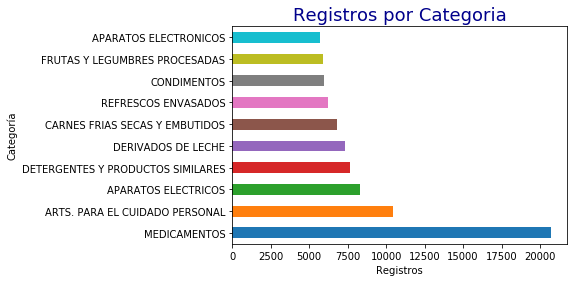

In [13]:
Category_Plot = df_category.plot.barh()
Category_Plot.set_xlabel('Registros')
Category_Plot.set_title('Registros por Categoria', fontsize = 18, color= 'DarkBlue')

In [14]:
#Estados = Master["Estado"].nunique()
Estados = master_2015frame.drop_duplicates("Estado")
#Estados.head(100)
Estados = Estados["Estado"].tolist()
Estados

['BAJA CALIFORNIA',
 'BAJA CALIFORNIA SUR',
 'ZACATECAS',
 'YUCATÁN',
 'TAMAULIPAS',
 'TLAXCALA',
 'SONORA',
 'TABASCO',
 'SINALOA',
 'QUINTANA ROO',
 'VERACRUZ DE IGNACIO DE LA LLAVE',
 'SAN LUIS POTOSÍ',
 'NAYARIT',
 'NUEVO LEÓN',
 'OAXACA',
 'QUERÉTARO',
 'JALISCO',
 'MÉXICO',
 'PUEBLA',
 'MICHOACÁN DE OCAMPO',
 'MORELOS',
 'DISTRITO FEDERAL',
 'AGUASCALIENTES',
 'GUERRERO',
 'HIDALGO',
 'GUANAJUATO',
 'DURANGO',
 'COLIMA',
 'CHIAPAS',
 'COAHUILA DE ZARAGOZA',
 'CHIHUAHUA',
 'CAMPECHE',
 'M��XICO']

In [15]:
category_state = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].groupby(\
                            ['Estado', 'Categoría'])['Categoría'].count().nlargest(5)
#category_state
category_total = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].count()
category_total = category_total['ID']
category_total

20720

In [16]:
#master_frame.groupby(master_frame['Fecha'].date.dt.year)

## Gráfica 3
### Count de categoría por Estado

Aquí tienes que hacer un chart con el número de categorías por Top 5 de estados - Eje X = Estado Eje Y = Categoría

In [45]:
top5_category = pd.DataFrame([category_state])
top5_category.columns = top5_category.columns.droplevel(-1)
#Data Frame con el Top 5 de estados con mayores registros de medicamentos
top5_category.transpose().reset_index()


,Estado,Categoría
0,DISTRITO FEDERAL,4558
1,MÉXICO,4223
2,GUANAJUATO,1992
3,NUEVO LEÓN,1558
4,JALISCO,1328


Text(0.5,1,'Categorias por Estado')

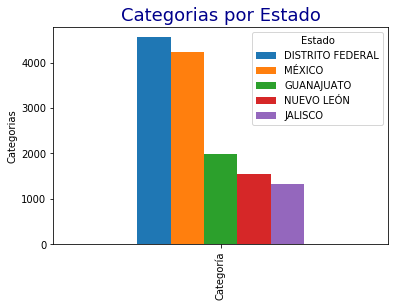

In [46]:
#x='Estado', y='Categoría', rot=0
Top5Chart = top5_category.plot.bar()
Top5Chart.set_ylabel('Categorias')
Top5Chart.set_title('Categorias por Estado', fontsize = 18, color= 'DarkBlue')

## Gráfica 4
### % del total de productos de la categoría medicamentos por Estado

Esta es una métrica que saqué aparte y creo que si es posible podríamos fusionar la primera con la gráfica3 y podemos hacer una gráfica combinada de barras y línea para que salgan ambas métricas. pero l oque sea más fácil

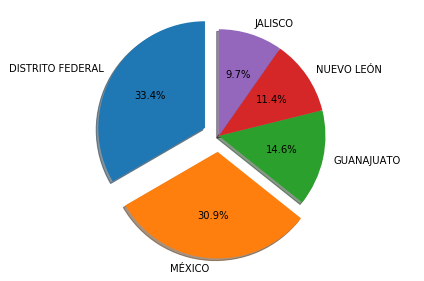

In [67]:
#Data Frame con el Top 5 de estados con el % de contribución del total de registros de medicamentos
category_transpose = top5_category.transpose().reset_index()
category_transpose['Porcentaje'] = (category_transpose['Categoría'] / category_total)*100
#other = category_total - top5_category
#top5_categoryperc.reset_index(inplace=False)
#category_transpose= category_transpose.style.format("{:.2%}")
#category_transpose.plot(kind='bar',y='Porcentaje', x='Estado')
#plt.show()
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    category_transpose['Porcentaje'],
    # with the labels being officer names
    labels=category_transpose['Estado'],
    # with no shadows
    shadow=True,
    # with colors

    # with one slide exploded out
    explode=(0.15, 0.15, 0, 0, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

In [41]:
x= ['DISTRITO FEDERAL', 'MÉXICO', 'GUANAJUATO', 'NUEVO LEÓN', 'JALISCO']
y= [top5_categoryperc['Categoría']]
Category_perc = top5_categoryperc.plot.pie(x=x, y=y)
Category_perc.set_title('Porcentaje de Categoria por Estado')


KeyError: 'Estado'

## Gráfica 5
### Precio promedio de medicamentos 2015 por top 5 (max precio)

Gráfica que ponga el top 5 de los estados con mayor precio en Mexico

In [21]:
avg_medprice = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].groupby(\
                            ['Categoría'])['Precio'].mean().nlargest(32)
#avg_medprice = avg_medprice['ID']
avg_medprice = avg_medprice['MEDICAMENTOS']
avg_medprice

379.6187374517428

In [43]:
avg_price = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].groupby(\
                            ['Estado', 'Categoría'])['Precio'].mean().nlargest(5)
avg_price_df# = pd.DataFrame(avg_price)
#avg_price_df.reset_index(inplace=True)
#avg_price_df

,Estado,Categoría,Precio
0,SINALOA,MEDICAMENTOS,430.158429
1,M��XICO,MEDICAMENTOS,421.190000
2,SONORA,MEDICAMENTOS,416.815631
3,MICHOACÁN DE OCAMPO,MEDICAMENTOS,415.290411
4,DISTRITO FEDERAL,MEDICAMENTOS,405.847330


In [42]:
#Avg_price_State = avg_price.plot.pie()
#Avg_price_State.axis('equal')
#Avg_price_State.set_title('Categorias de Medicamentos/ Estado', fontsize = 18, color= 'DarkBlue')




In [ ]:
top5_price = pd.DataFrame([avg_price])
top5_price.columns = top5_price.columns.droplevel(-1)
#Data Frame con el Top 5 de estados con mayores registros de medicamentos
top5_price.transpose()

In [ ]:
TOP_PRICE = top5_price.plot.bar()


## Gráfica 6
### % prima o descuento de precio promedio en medicamentos por el top 5 de Estados con mayor precio

Esta es una métrica que saqué aparte y creo que si es posible podríamos fusionar la primera con la gráfica5 y podemos hacer una gráfica combinada de barras y línea para que salgan ambas métricas. pero l oque sea más fácil

In [ ]:
top5_priceperc = top5_price / avg_medprice - 1
top5_priceperc.transpose().style.format("{:.2%}")

In [ ]:
top5_priceperc.plot.bar()

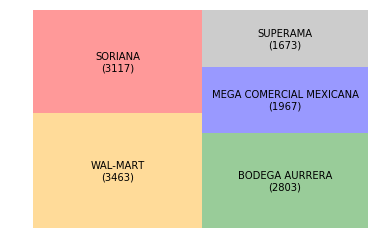

In [69]:
chain_category = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].groupby(\
                            ['Cadena', 'Categoría'])['Categoría'].count().nlargest(5)
#chain_category
chain_category_df = pd.DataFrame(chain_category)
#chain_category_df.reset_index(inplace=True)
chain_category_df.columns = ['Medicamentos Registrados']
chain_category_df.reset_index(inplace=True)
chain_category_df.sort_values(by=['Medicamentos Registrados'],ascending =True)
#label_val = chain_category_df['Cadena'] + '\n' + chain_category_df['Medicamentos Registrados']
temp_cadena = list(chain_category_df['Cadena'])
temp_medicine = list(chain_category_df['Medicamentos Registrados'])
labels_val =[]
for i in range(len(temp_cadena)):
    labels_val.append(temp_cadena[i] + '\n(' + str(temp_medicine[i]) + ')')
squarify.plot(sizes=chain_category_df['Medicamentos Registrados'], label=labels_val, color=['orange',"red","green","blue", "grey"], alpha=.4 )
plt.axis('off')
plt.show()


## Gráfica 7
### Count de categoría por Cadena top5

Aquí tienes que hacer un chart con el número de categorías por Top 5 de cadenaS - Eje X = Cadena Eje Y = Categoría

In [70]:
top5_chain = pd.DataFrame([chain_category])
top5_chain.columns = top5_chain.columns.droplevel(-1)
#Data Frame con el Top 5 de estados con mayores registros de medicamentos
top5_chain.transpose().reset_index()

,Cadena,Categoría
0,WAL-MART,3463
1,SORIANA,3117
2,BODEGA AURRERA,2803
3,MEGA COMERCIAL MEXICANA,1967
4,SUPERAMA,1673


In [ ]:
Top5Chaincat = top5_chain.plot.barh()
Top5Chaincat.set_title('Categorias de Medicamentos/ Estado', fontsize = 18, color= 'DarkBlue')

## Gráfica 8
### % del total de productos de la categoría medicamentos por Cadena Comercial

Esta es una métrica que saqué aparte y creo que si es posible podríamos fusionar la primera con la gráfica7 y podemos hacer una gráfica combinada de barras y línea para que salgan ambas métricas. pero l oque sea más fácil

In [ ]:
top5_chainperc = top5_chain / category_total
top5_chainperc.transpose().style.format("{:.2%}")

In [ ]:
Top5ChainPerc = top5_chainperc.plot.bar()
Top5ChainPerc.set_title('Categorias de Medicamentos/ Estado', fontsize = 18, color= 'DarkBlue')
Top5ChainPerc.axis('equal')

In [ ]:
chain_price = master_2015frame[master_2015frame['Categoría'] == 'MEDICAMENTOS'].groupby(\
                            ['Cadena'])['Precio'].mean().nlargest(5)
chain_price

In [ ]:
Chainpriceplot = chain_price.plot.barh()
Chainpriceplot.set_title('Categorias de Medicamentos/ Estado', fontsize = 18, color= 'DarkBlue')

## Gráfica 9
### Precio promedio de medicamentos 2015 por top 5 cadenas (max precio)

Gráfica que ponga el top 5 de las cadenas con mayor precio en Mexico

In [ ]:
top5_chainprice = pd.DataFrame([chain_price])
#top5_chainprice.columns = top5_chain.columns.droplevel(-1)
#Data Frame con el Top 5 de estados con mayores registros de medicamentos
top5_chainprice.transpose()

## Gráfica 10
### % prima o descuento de precio promedio en medicamentos por el top 5 de Cadenas con mayor precio

Esta es una métrica que saqué aparte y creo que si es posible podríamos fusionar la primera con la gráfica9 y podemos hacer una gráfica combinada de barras y línea para que salgan ambas métricas. pero l oque sea más fácil

In [ ]:
top5_chainpriceperc = top5_chainprice / avg_medprice - 1
top5_chainpriceperc.transpose().style.format("{:.2%}")

In [ ]:
top5_chainpriceperc.plot.violinplot()

In [ ]:
y= "chain_price" in chain_price.plot
top5_chainpriceperc.plot.scatter()


# A huevo, nos la pela esto

# (A huevo, nos la pela esto) x2
